In [1]:
import sys, os
import sparse
import xsimlab as xs
import numpy as np
import pandas as pd
import igraph as ig

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), '..'))
import vmlab
from vmlab.models import fruit_model as model

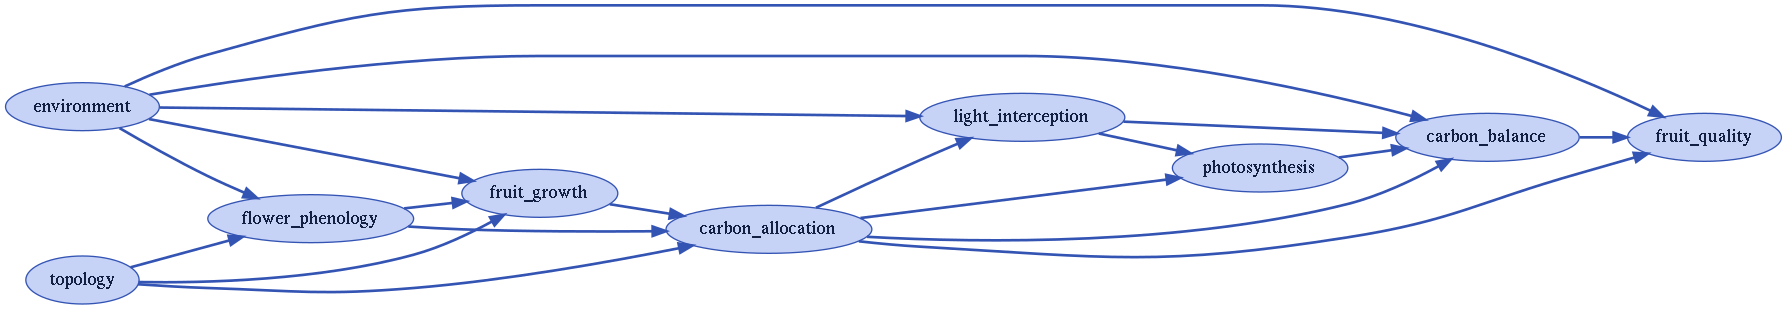

In [3]:
model.visualize(show_inputs=False, show_variables=False)

In [4]:
nb_leaves_gu = [5, 10, 25, 50, 100, 150] # same as in original fruit model publication
nb_gus = len(nb_leaves_gu)
adjacency = sparse.COO(np.array([
    np.full(nb_gus - 1, 0),
    np.arange(1, nb_gus)
]), True, shape=(nb_gus, nb_gus))

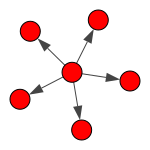

In [5]:
ig.plot(ig.Graph.Adjacency(adjacency.todense().tolist()), bbox=(0,0,150,150))

In [6]:
ds = vmlab.create_setup(
    model=model,
    setup_toml='../share/setup/fruit_model.toml',
    clocks={
        'day': pd.date_range(start='2002-12-01', end='2003-03-31', freq="1d"),
        'week': pd.date_range(start='2002-12-01', end='2003-03-31', freq="1W")
    },
    main_clock='day',
    input_vars={
        'topology': {
            'adjacency': adjacency,
            'nb_leaves_gu': nb_leaves_gu
        },
        'fruit_growth': {
            'nb_fruits_ini': np.full(nb_gus, 1)
        },
        'flower_phenology': {
            'bloom_date': np.full(nb_gus, '2002-11-01')
        }
    }
)

In [7]:
ds

Format,coo
Data Type,bool
Shape,"(6, 6)"
nnz,5
Density,0.1388888888888889
Read-only,True
Size,85
Storage ratio,2.4


In [8]:
ds_out = ds.xsimlab.run(model=model, decoding={ 'mask_and_scale': False }, hooks=[xs.monitoring.ProgressBar()])

             0% | initialize 

/home/jvail/cirad/jvail/vmango-lab/notebooks/../vmlab/processes/carbon_balance.py:362: UserWarning: Vegetative part of the system dies ...
  warnings.warn('Vegetative part of the system dies ...')


In [9]:
ds_out

<xarray.Dataset>
Dimensions:                                  (CU: 6, GU: 6, day: 121, hour: 24, week: 18)
Coordinates:
  * CU                                       (CU) <U10 'CU0' 'CU1' ... 'CU5'
  * GU                                       (GU) <U10 'GU0' 'GU1' ... 'GU5'
  * day                                      (day) datetime64[ns] 2002-12-01 ...
  * hour                                     (hour) int8 0 1 2 3 ... 20 21 22 23
  * week                                     (week) datetime64[ns] 2002-12-01...
Data variables:
    carbon_allocation__CUxGU                 (day, CU, GU) float64 1.0 ... 1.0
    carbon_allocation__DM_fruit_0            (CU) float64 14.86 14.86 ... 14.86
    carbon_allocation__DM_fruit_max          (day, CU) float64 0.0 0.0 ... 90.14
    carbon_allocation__dd_cum                (day, CU) float64 0.0 ... 1.206e+03
    carbon_allocation__dd_delta              (day, CU) float64 0.0 0.0 ... 9.9
    carbon_allocation__nb_fruits             (day, CU) float64 0.0 0.0 ... 1.0
    carbon_allocation__nb_leaves             (day, CU) float64 5.0 ... 150.0
    carbon_balance__DM_fruit                 (day, CU) float64 0.0 0.0 ... 90.09
    carbon_balance__DM_fruit_delta           (day, CU) float64 0.0 ... 0.005539
    carbon_balance__DM_structural_leaf       (day, CU) float64 0.0 0.0 ... 111.1
    carbon_balance__DM_structural_stem       (day, CU) float64 53.66 ... 53.66
    carbon_balance__D_fruit                  (day, CU) float64 0.0 ... 0.00257
    carbon_balance__MR_fruit                 (day, CU) float64 0.0 ... 0.1364
    carbon_balance__MR_leaf                  (day, CU) float64 0.0 0.0 ... 0.365
    carbon_balance__MR_repro                 (day, CU) float64 0.0 ... 0.1364
    carbon_balance__MR_stem                  (day, CU) float64 0.0 ... 0.07596
    carbon_balance__MR_veget                 (day, CU) float64 0.0 ... 0.4409
    carbon_balance__assimilates              (day, CU) float64 0.04289 ... 2.072
    carbon_balance__parameter_file_path      <U71 '/home/jvail/cirad/jvail/vm...
    carbon_balance__remains_1                (day, CU) float64 0.04289 ... 1.631
    carbon_balance__remains_2                (day, CU) float64 0.04289 ... 1.495
    carbon_balance__remains_3                (day, CU) float64 0.04289 ... 1.492
    carbon_balance__required_DM_fruit        (day, CU) float64 0.0 0.0 ... 0.0
    carbon_balance__reserve_leaf             (day, CU) float64 0.0 0.0 ... 1.45
    carbon_balance__reserve_leaf_max         (day, CU) float64 0.0 0.0 ... 0.0
    carbon_balance__reserve_mob              (day, CU) float64 0.04289 ... 0....
    carbon_balance__reserve_nmob_leaf        (day, CU) float64 0.0 0.0 ... 0.0
    carbon_balance__reserve_nmob_stem        (day, CU) float64 2.573 ... 2.53
    carbon_balance__reserve_stem             (day, CU) float64 2.616 ... 2.573
    environment__GR                          (day, hour) float64 0.0 0.0 ... 0.0
    environment__RH                          (day, hour) float64 88.0 ... 83.0
    environment__TM                          (day) float64 25.45 24.65 ... 25.9
    environment__TM_air                      (day, hour) float64 25.1 ... 25.9
    environment__T_air                       (day, hour) float64 22.6 ... 19.6
    environment__T_fruit                     (day, hour) float64 22.6 ... 19.6
    environment__parameter_file_path         <U68 '/home/jvail/cirad/jvail/vm...
    flower_phenology__DAB                    (day, GU) float64 30.0 ... 149.0
    flower_phenology__bloom_date             (GU) datetime64[D] 2002-11-01 .....
    flower_phenology__dd_cum_gu              (day, GU) float64 9.45 ... 1.206...
    flower_phenology__dd_delta_gu            (day, GU) float64 9.45 9.45 ... 9.9
    flower_phenology__parameter_file_path    <U66 '/home/jvail/cirad/jvail/vm...
    fruit_growth__DM_fruit_0_gu              (GU) float64 14.86 14.86 ... 14.86
    fruit_growth__DM_fruit_max_gu            (day, GU) float64 0.0 0.0 ... 90.14
    fruit_growth__nb_fruits_gu      

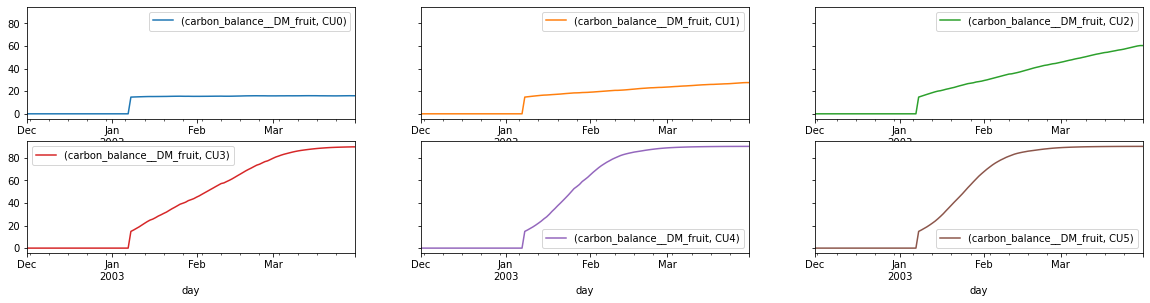

In [10]:
_ = ds_out.carbon_balance__DM_fruit.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

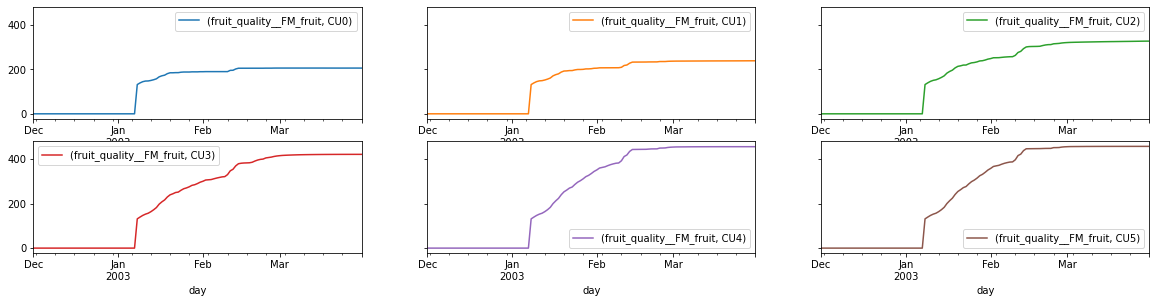

In [11]:
_ = ds_out.fruit_quality__FM_fruit.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

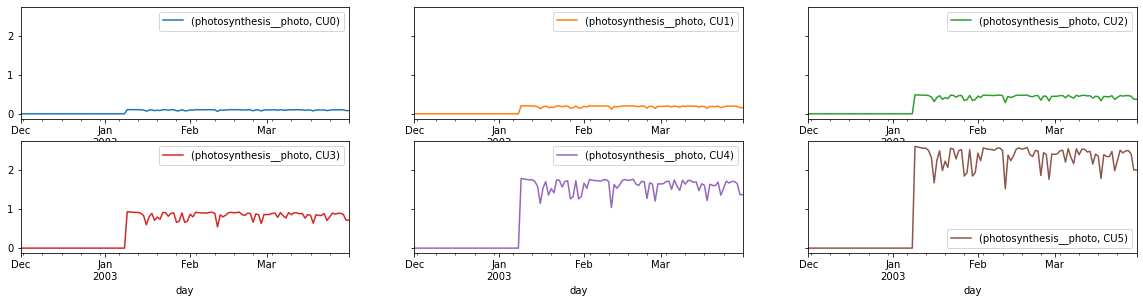

In [12]:
_ = ds_out.photosynthesis__photo.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

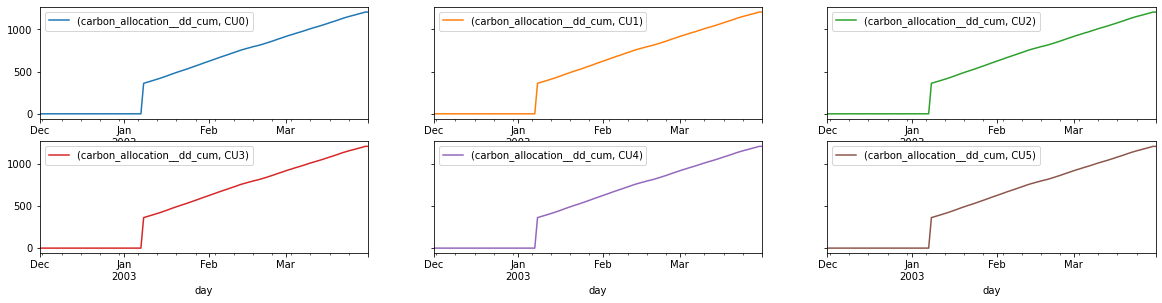

In [13]:
_ = ds_out.carbon_allocation__dd_cum.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

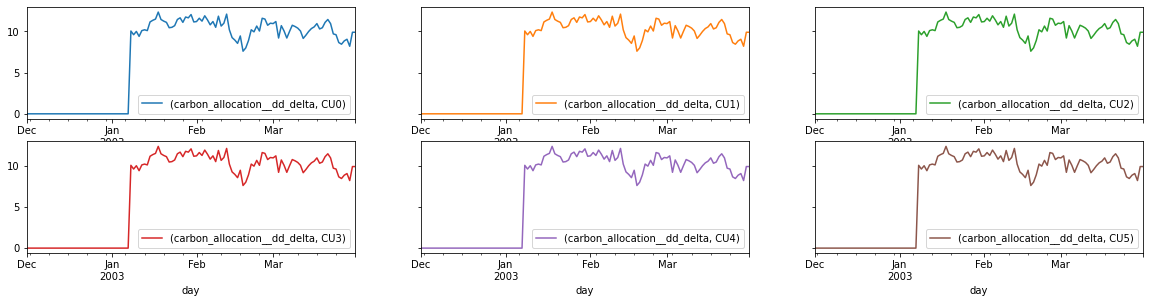

In [14]:
_ = ds_out.carbon_allocation__dd_delta.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

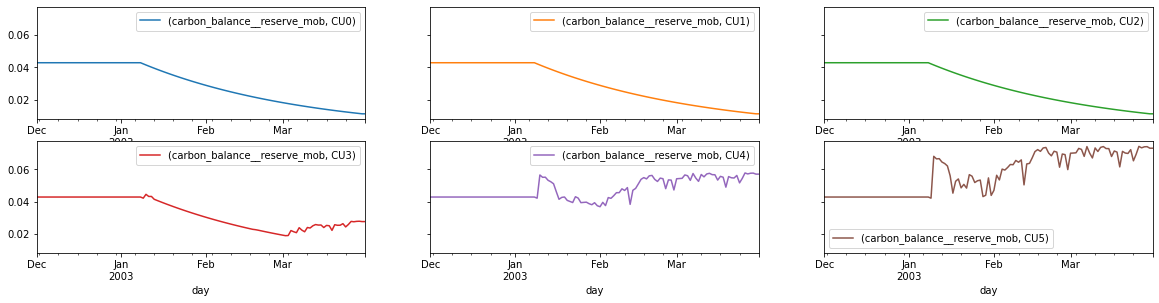

In [15]:
_ = ds_out.carbon_balance__reserve_mob.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

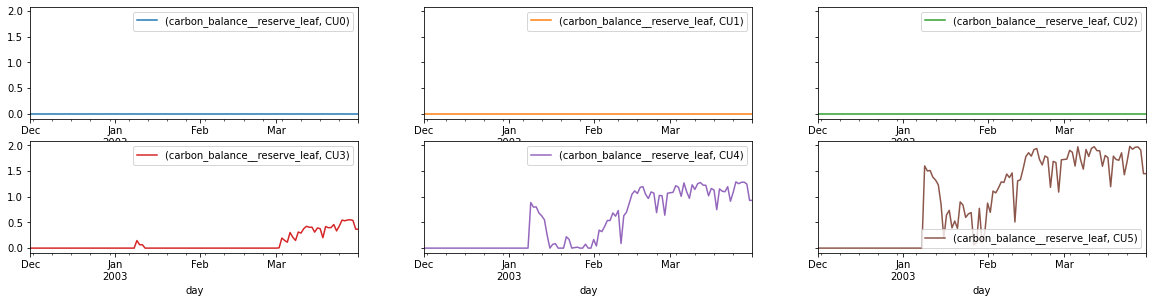

In [16]:
_ = ds_out.carbon_balance__reserve_leaf.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

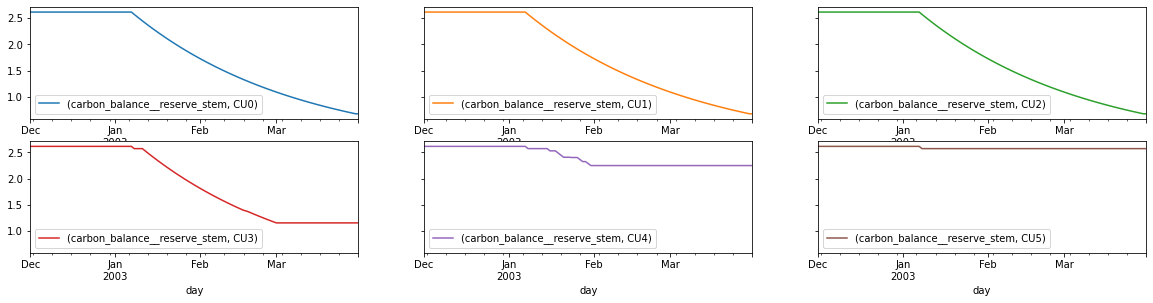

In [17]:
_ = ds_out.carbon_balance__reserve_stem.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

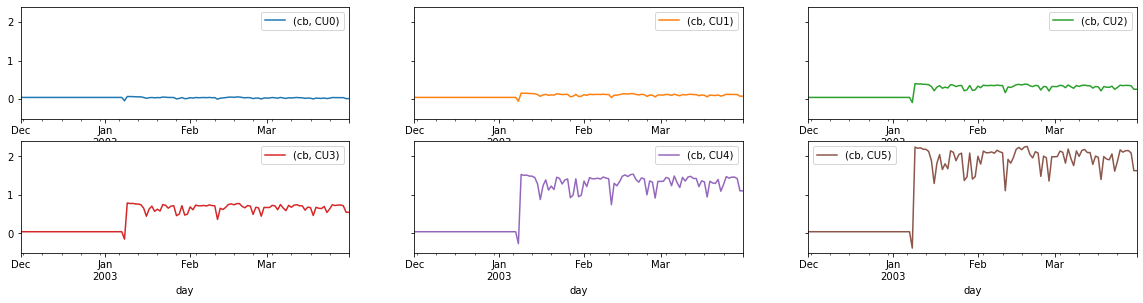

In [18]:
# when the fruit "appears" the balance in negative for a short period. Therefore the warning "veg. part dies" - maybe a bug?
_ = (ds_out.carbon_balance__assimilates - ds_out.carbon_balance__MR_veget) \
    .to_dataframe('cb').unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

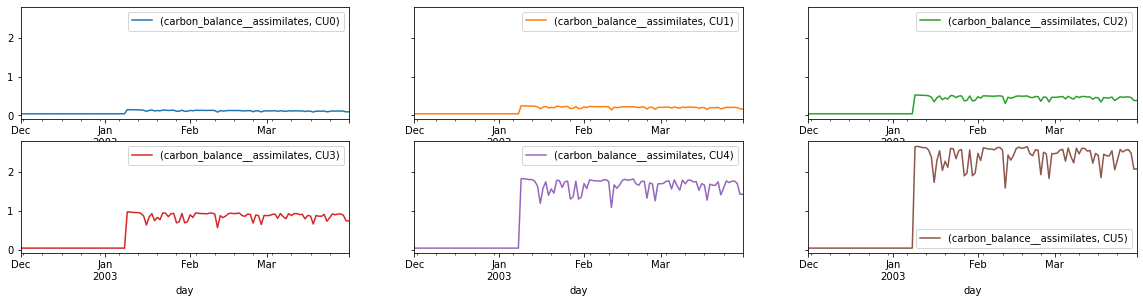

In [19]:
_ = ds_out.carbon_balance__assimilates.to_dataframe().unstack(level=1).plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)